In [614]:
import pandas as pd 
import numpy as np

df = pd.read_csv("unicorn.csv")

In [615]:
df = df.drop('Date Joined', axis=1)
df


,Company,Valuation,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [616]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
   
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    text = ' '.join([lemmatizer.lemmatize(word) for word in tokens if word not in stop_words])
    text = re.sub(r'\s+', ' ', text).strip()
    return text

original_text = "Hello, 123 worl3524$%^.,d! T435%$h3453is is a te456xt with this this spe###ci.,al characters: @ and punctuation, like pe,,riods and commas."
processed_text = preprocess_text(original_text)
print(processed_text)

hello world text special character punctuation like period comma


In [617]:
df['Valuation'] = df['Valuation'].str[1:-1].astype(float)


In [618]:
def convert_to_numeric(value):
    try:
        if 'M' in value:
            return float(value[1:-1])/1000
        else:
            return float(value[1:-1])  # Assume it's a plain number if no suffix
    except ValueError:
        return None  # Handle the case where the conversion fails



# Convert the list elements to numeric values
df['Funding'] = [convert_to_numeric(value) for value in df['Funding']]


In [619]:
df.loc[df['Industry'].str.contains('Artificial', case=False), 'Industry'] = 'AI'


In [620]:
average_valuation_by_industry = df.groupby('Industry')[['Funding', 'Valuation']].mean()

# Display the result
print(average_valuation_by_industry)

                                      Funding  Valuation
Industry                                                
AI                                   0.557167   4.488095
Auto & transportation                1.131419   3.193548
Consumer & retail                    1.062167   4.240000
Cybersecurity                        0.438640   2.580000
Data management & analytics          0.449525   3.317073
E-commerce & direct-to-consumer      0.682908   3.837838
Edtech                               0.781250   3.571429
Fintech                              0.486468   3.937500
Hardware                             0.628971   2.911765
Health                               0.458703   2.675676
Internet software & services         0.359384   2.902439
Mobile & telecommunications          0.402270   2.342105
Other                                0.715071   4.344828
Supply chain, logistics, & delivery  0.792732   3.105263
Travel                               0.901857   3.285714


array([[<Axes: title={'center': 'Valuation'}>,
        <Axes: title={'center': 'Year Founded'}>],
       [<Axes: title={'center': 'Funding'}>, <Axes: >]], dtype=object)

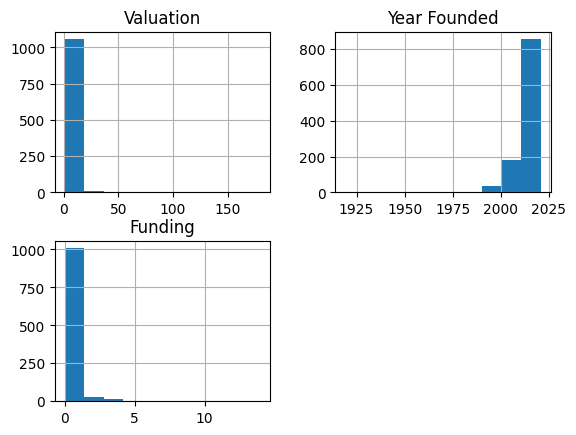

In [612]:
df.hist()

In [613]:
noise_std = 0.02
np.random.seed(42)  # For reproducibility
df['Valuation'] += np.random.normal(0, noise_std, len(df))
df['Year Founded'] += np.random.normal(0, noise_std, len(df))
df['Funding'] += np.random.normal(0, noise_std, len(df))

In [ ]:
df.Valuation =  np.log1p(df.Valuation)
df.Funding =  np.log1p(df.Funding)

In [ ]:
average_valuation_by_industry = df.groupby('Industry')[['Funding', 'Valuation']].mean()

# Display the result
print(average_valuation_by_industry)

In [591]:
average_valuation_by_industry = df.groupby('Industry')[['Funding', 'Valuation']].mean()

# Display the result
print(average_valuation_by_industry)

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# Create bins based on percentiles for 'Valuation', 'Year Founded', and 'Funding'
df['Valuation'] 
df['Year Founded']
df['Funding'] 

In [ ]:

# Define percentiles
valuation_bins = [float('-inf'), df['Valuation'].median(), float('inf')]
year_founded_bins = [float('-inf'), df['Year Founded'].median(), float('inf')]
funding_bins = [float('-inf'), df['Funding'].median(), float('inf')]

# Create new columns with bin labels
df['Valuation'] = pd.cut(df['Valuation'], bins=valuation_bins, labels=['LowVal', 'HighVal'])
df['Year Founded'] = pd.cut(df['Year Founded'], bins=year_founded_bins, labels=['BeforeMid', 'AfterMid'])
df['Funding'] = pd.cut(df['Funding'], bins=funding_bins, labels=['LowFund', 'HighFund'])

In [592]:
df1 = df.copy()

In [593]:
df1

,Company,Valuation,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [594]:
df1.Valuation.value_counts()

Valuation
$1B      471
$2B      248
$3B      115
$4B       72
$5B       40
$6B       26
$7B       18
$10B      15
$8B       13
$9B       10
$12B      10
$11B       7
$13B       4
$15B       4
$100B      2
$20B       2
$32B       2
$38B       2
$40B       2
$17B       1
$14B       1
$18B       1
$22B       1
$25B       1
$27B       1
$33B       1
$39B       1
$46B       1
$95B       1
$180B      1
Name: count, dtype: int64

In [595]:
df1.Funding.value_counts()

Funding
$1B        60
$2B        30
Unknown    12
$200M      12
$4B         9
           ..
$717M       1
$101M       1
$19M        1
$946M       1
$620M       1
Name: count, Length: 539, dtype: int64

In [596]:
df1.columns

Index(['Company', 'Valuation', 'Industry', 'City', 'Country/Region',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [597]:
y = df1.Valuation

In [598]:
X = df1.drop(['Valuation', 'Company'], axis=1)


In [524]:
X

,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Artificial intelligence,Beijing,China,Asia,BeforeMid,HighFund,"Sequoia Capital China, SIG Asia Investments, S..."
1,Other,Hawthorne,United States,North America,BeforeMid,HighFund,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,E-commerce & direct-to-consumer,Shenzhen,China,Asia,BeforeMid,HighFund,"Tiger Global Management, Sequoia Capital China..."
3,Fintech,San Francisco,United States,North America,BeforeMid,HighFund,"Khosla Ventures, LowercaseCapital, capitalG"
4,Fintech,Stockholm,Sweden,Europe,BeforeMid,HighFund,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...
1069,E-commerce & direct-to-consumer,Shanghai,China,Asia,BeforeMid,LowFund,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,E-commerce & direct-to-consumer,Beijing,China,Asia,AfterMid,HighFund,"58.com, Tencent Holdings"
1071,Consumer & retail,Chongqing,China,Asia,AfterMid,LowFund,"Xingwang Investment Management, China Capital ..."
1072,Fintech,London,United Kingdom,Europe,BeforeMid,HighFund,"IAG Capital Partners, Augmentum Fintech, North..."


## Now I am going to concat the investors name because I need uniqeness 

In [525]:
def concatenate_investors(cell):
    cell = str(cell)
    cell = cell.replace(' ', '')
    cell = cell.split(",")
    return " ".join(cell)
X['Select Investors'] = X['Select Investors'].apply(concatenate_investors)

In [526]:
X

,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Artificial intelligence,Beijing,China,Asia,BeforeMid,HighFund,SequoiaCapitalChina SIGAsiaInvestments SinaWei...
1,Other,Hawthorne,United States,North America,BeforeMid,HighFund,FoundersFund DraperFisherJurvetson RothenbergV...
2,E-commerce & direct-to-consumer,Shenzhen,China,Asia,BeforeMid,HighFund,TigerGlobalManagement SequoiaCapitalChina Shun...
3,Fintech,San Francisco,United States,North America,BeforeMid,HighFund,KhoslaVentures LowercaseCapital capitalG
4,Fintech,Stockholm,Sweden,Europe,BeforeMid,HighFund,InstitutionalVenturePartners SequoiaCapital Ge...
...,...,...,...,...,...,...,...
1069,E-commerce & direct-to-consumer,Shanghai,China,Asia,BeforeMid,LowFund,K2Ventures MatrixPartnersChina IDGCapital
1070,E-commerce & direct-to-consumer,Beijing,China,Asia,AfterMid,HighFund,58.com TencentHoldings
1071,Consumer & retail,Chongqing,China,Asia,AfterMid,LowFund,XingwangInvestmentManagement ChinaCapitalInves...
1072,Fintech,London,United Kingdom,Europe,BeforeMid,HighFund,IAGCapitalPartners AugmentumFintech NorthzoneV...


## It's now time to concat

In [527]:
concatenated_columns = X.apply(lambda x: ' '.join(map(str, x)), axis=1)

# Create a new column with the concatenated values
X['concat'] = concatenated_columns

In [528]:
X["concat"] = X["concat"].apply(preprocess_text)

## This is final Text that i will use to predict !!

In [535]:
Xval = X["concat"]
Xval.head(20)

0     artificial intelligence beijing china asia bef...
1     hawthorne united state north america beforemid...
2     ecommerce directtoconsumer shenzhen china asia...
3     fintech san francisco united state north ameri...
4     fintech stockholm sweden europe beforemid high...
5     internet software service surry hill australia...
6     fintech london united kingdom europe beforemid...
7     supply chain logistics delivery san francisco ...
8     consumer retail san francisco united state nor...
9     data management analytics san francisco united...
10    fintech london united kingdom europe aftermid ...
11    cary united state north america beforemid high...
12    fintech nan bahamas north america aftermid hig...
13    ecommerce directtoconsumer jacksonville united...
14    fintech san francisco united state north ameri...
15    edtech bengaluru india asia beforemid highfund...
16    supply chain logistics delivery jakarta indone...
17    ecommerce directtoconsumer shanghai china 

In [545]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xval, y, test_size=0.10, random_state=42)


In [546]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,4), max_features = 30000 )
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform X_test
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [547]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C_values = [0.001, 0.01, 0.1, .5,.8]  # Regularization strengths

for C in C_values:
    model = LogisticRegression(C=C, random_state=42)
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Regularization Strength (C): {C}, Accuracy: {accuracy:.2f}")

Regularization Strength (C): 0.001, Accuracy: 0.45
Regularization Strength (C): 0.01, Accuracy: 0.61
Regularization Strength (C): 0.1, Accuracy: 0.67
Regularization Strength (C): 0.5, Accuracy: 0.67
Regularization Strength (C): 0.8, Accuracy: 0.66


In [548]:
y_pred
y_test

df = datagrame({ "Model Predict" : y_pred, "Actual"})

array(['LowVal', 'LowVal', 'HighVal', 'LowVal', 'LowVal', 'LowVal',
       'LowVal', 'HighVal', 'LowVal', 'LowVal', 'LowVal', 'HighVal',
       'HighVal', 'HighVal', 'LowVal', 'HighVal', 'HighVal', 'LowVal',
       'HighVal', 'LowVal', 'HighVal', 'LowVal', 'LowVal', 'LowVal',
       'HighVal', 'LowVal', 'LowVal', 'LowVal', 'LowVal', 'LowVal',
       'HighVal', 'LowVal', 'HighVal', 'LowVal', 'LowVal', 'HighVal',
       'HighVal', 'HighVal', 'HighVal', 'HighVal', 'LowVal', 'LowVal',
       'LowVal', 'HighVal', 'HighVal', 'LowVal', 'HighVal', 'LowVal',
       'HighVal', 'LowVal', 'LowVal', 'LowVal', 'LowVal', 'LowVal',
       'LowVal', 'HighVal', 'LowVal', 'HighVal', 'LowVal', 'LowVal',
       'LowVal', 'HighVal', 'LowVal', 'HighVal', 'LowVal', 'HighVal',
       'HighVal', 'HighVal', 'LowVal', 'HighVal', 'HighVal', 'LowVal',
       'LowVal', 'HighVal', 'LowVal', 'LowVal', 'HighVal', 'LowVal',
       'HighVal', 'LowVal', 'LowVal', 'LowVal', 'HighVal', 'HighVal',
       'HighVal', 'HighVal'

In [549]:
y_test

542     HighVal
370     HighVal
307     HighVal
493      LowVal
350     HighVal
         ...   
715      LowVal
1019     LowVal
198     HighVal
554     HighVal
76      HighVal
Name: Valuation, Length: 108, dtype: category
Categories (2, object): ['LowVal' < 'HighVal']